Exploratory Data Analysis is done on transactional data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers. The data is obtained from [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/online+retail).

The following actions are performed on the data:
1. Handle missing values and negative values
1. Calculate amount spent
1. Calculate year month, day, hour
1. No of Orders and Amount spent by country
1. Top 10 customers by amount spent and no of orders
1. No of Orders by Date (Month, day and hour)
1. Items given for free ie., unit price is 0
1. Money Spent by country
1. Repeat customers
1. Unique vs Repeat customers over time
1. Total Revenue vs Revenue from Repeat customers
1. Item trends over time

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import re
import datetime

%matplotlib inline
plt.style.use('ggplot')
color=sns.color_palette("rocket")
color1=sns.color_palette("tab10")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Datasets/Online Retail.xlsx')

In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


## Exploring and Analysing Data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [ ]:
# Check for null values in the data
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [ ]:
# Remove rows with null values
df=df.dropna()
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [ ]:
# Change customerID column from float to int
df['CustomerID']=df['CustomerID'].astype('int64')

In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


In [ ]:
df.describe().round(2)

,Quantity,UnitPrice,CustomerID
count,406829.00,406829.00,406829.00
mean,12.06,3.46,15287.69
std,248.69,69.32,1713.60
min,-80995.00,0.00,12346.00
25%,2.00,1.25,13953.00
50%,5.00,1.95,15152.00
75%,12.00,3.75,16791.00
max,80995.00,38970.00,18287.00


The minimum value of Quantity is negative which is not possible as it should be a whole number. So the negative entries needs to be removed.

In [ ]:
# Creating a copy of the dataframe to perform operations
ecom=df.copy()
ecom.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


In [ ]:
ecom = ecom[ecom['Quantity']>0]
ecom.describe().round(2)

,Quantity,UnitPrice,CustomerID
count,397924.00,397924.00,397924.00
mean,13.02,3.12,15294.32
std,180.42,22.10,1713.17
min,1.00,0.00,12346.00
25%,2.00,1.25,13969.00
50%,6.00,1.95,15159.00
75%,12.00,3.75,16795.00
max,80995.00,8142.75,18287.00


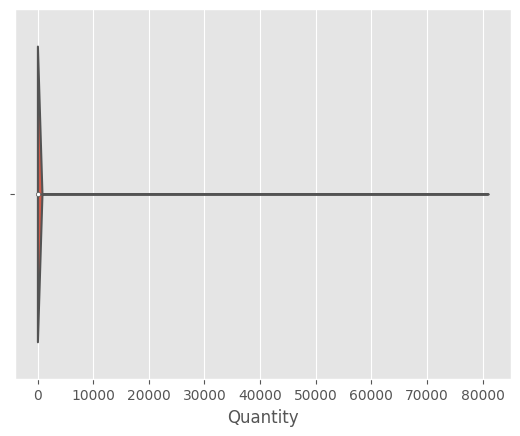

In [ ]:
ax = sns.violinplot(x = ecom['Quantity'])

Add a column called AmountSpent to calculate the amount spent in each transaction:
AmountSpent = Quantity * UnitPrice

In [ ]:
ecom['AmountSpent'] = ecom['Quantity'] * ecom['UnitPrice']
ecom.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,AmountSpent
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850,United Kingdom,15.30
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850,United Kingdom,25.50
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850,United Kingdom,11.10
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850,United Kingdom,11.10
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047,United Kingdom,54.08


Adding columns for Month Year, Month, Day, Weekday, hour from InvoiceDate column

In [ ]:
ecom['MonthYear'] = ecom['InvoiceDate'].dt.to_period('M')
ecom['Year'] = ecom['InvoiceDate'].dt.year
ecom['Month'] = ecom['InvoiceDate'].dt.month
ecom['Day'] = ecom['InvoiceDate'].dt.day
ecom['Weekday'] = ecom['InvoiceDate'].dt.dayofweek
ecom['Hour'] = ecom['InvoiceDate'].dt.hour

ecom.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,AmountSpent,MonthYear,Year,Month,Day,Weekday,Hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010-12,2010,12,1,2,8
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,2010,12,1,2,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010-12,2010,12,1,2,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,2010,12,1,2,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,2010,12,1,2,8


In [ ]:
ecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397924 entries, 0 to 541908
Data columns (total 15 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397924 non-null  object        
 1   StockCode    397924 non-null  object        
 2   Description  397924 non-null  object        
 3   Quantity     397924 non-null  int64         
 4   InvoiceDate  397924 non-null  datetime64[ns]
 5   UnitPrice    397924 non-null  float64       
 6   CustomerID   397924 non-null  int64         
 7   Country      397924 non-null  object        
 8   AmountSpent  397924 non-null  float64       
 9   MonthYear    397924 non-null  period[M]     
 10  Year         397924 non-null  int64         
 11  Month        397924 non-null  int64         
 12  Day          397924 non-null  int64         
 13  Weekday      397924 non-null  int64         
 14  Hour         397924 non-null  int64         
dtypes: datetime64[ns](1), float64(2), 

In [ ]:
ecom['Weekday'].unique()

array([2, 3, 4, 6, 0, 1])

In [ ]:
ecom['Weekday'] = ecom['Weekday']+1
ecom.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,AmountSpent,MonthYear,Year,Month,Day,Weekday,Hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010-12,2010,12,1,3,8
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,2010,12,1,3,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010-12,2010,12,1,3,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,2010,12,1,3,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,2010,12,1,3,8


### Purchasing Patterns

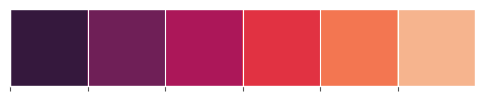

In [ ]:
sns.palplot(color)

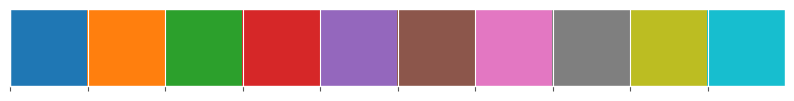

In [ ]:
sns.palplot(color1)

#### No of Orders per Country

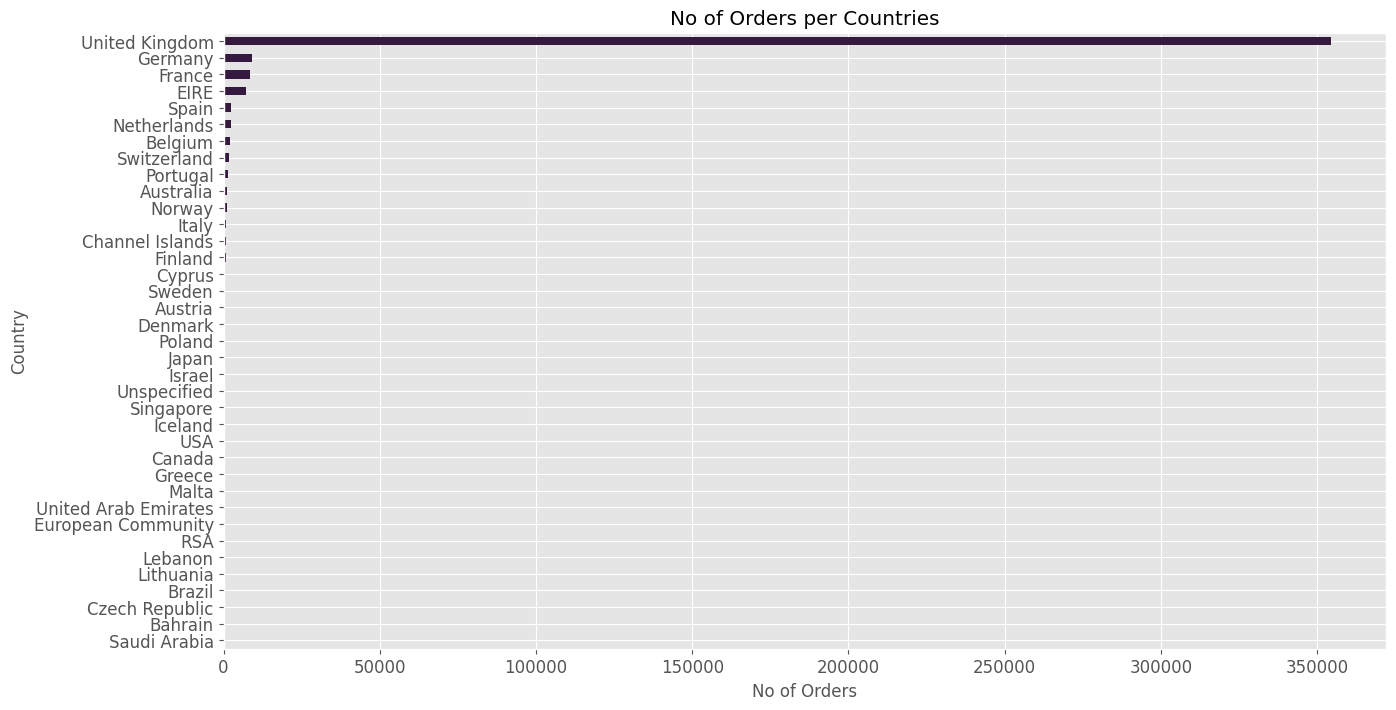

In [ ]:
country_orders = ecom.groupby('Country')['InvoiceNo'].count().sort_values()

plt.subplots(figsize=(15,8))
country_orders.plot.barh(fontsize=12,color=color[0])
plt.xlabel('No of Orders', fontsize=12)
plt.ylabel('Country',fontsize=12)
plt.title('No of Orders per Countries')
plt.show()

The orders in Uk are extremely large as compared to other countries. Therefore, Plotting without UK will help clarify the purchasing patterns of the other countries.

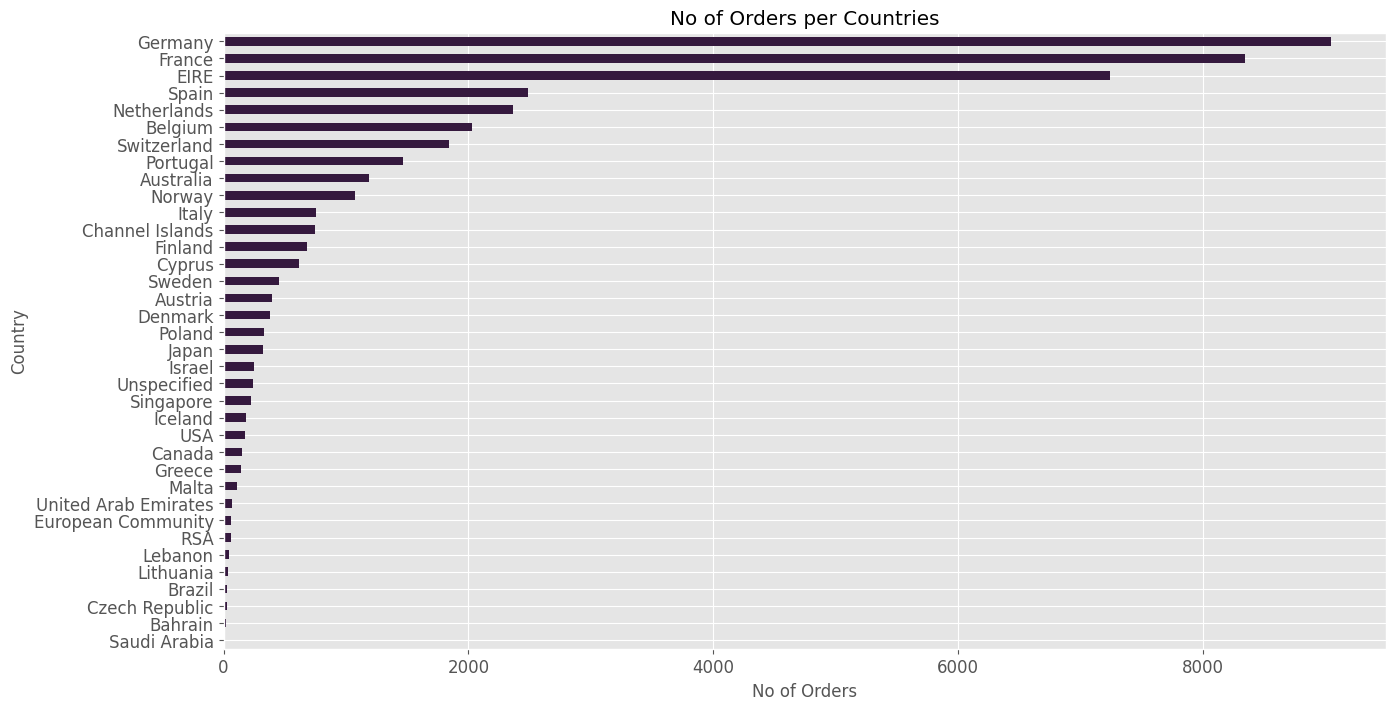

In [ ]:
country_orders_without_uk = country_orders.copy()
del country_orders_without_uk['United Kingdom']

plt.subplots(figsize=(15,8))
country_orders_without_uk.plot.barh(fontsize=12,color=color[0])
plt.xlabel('No of Orders', fontsize=12)
plt.ylabel('Country',fontsize=12)
plt.title('No of Orders per Countries')
plt.show()

#### Amount Spent by Different Countries

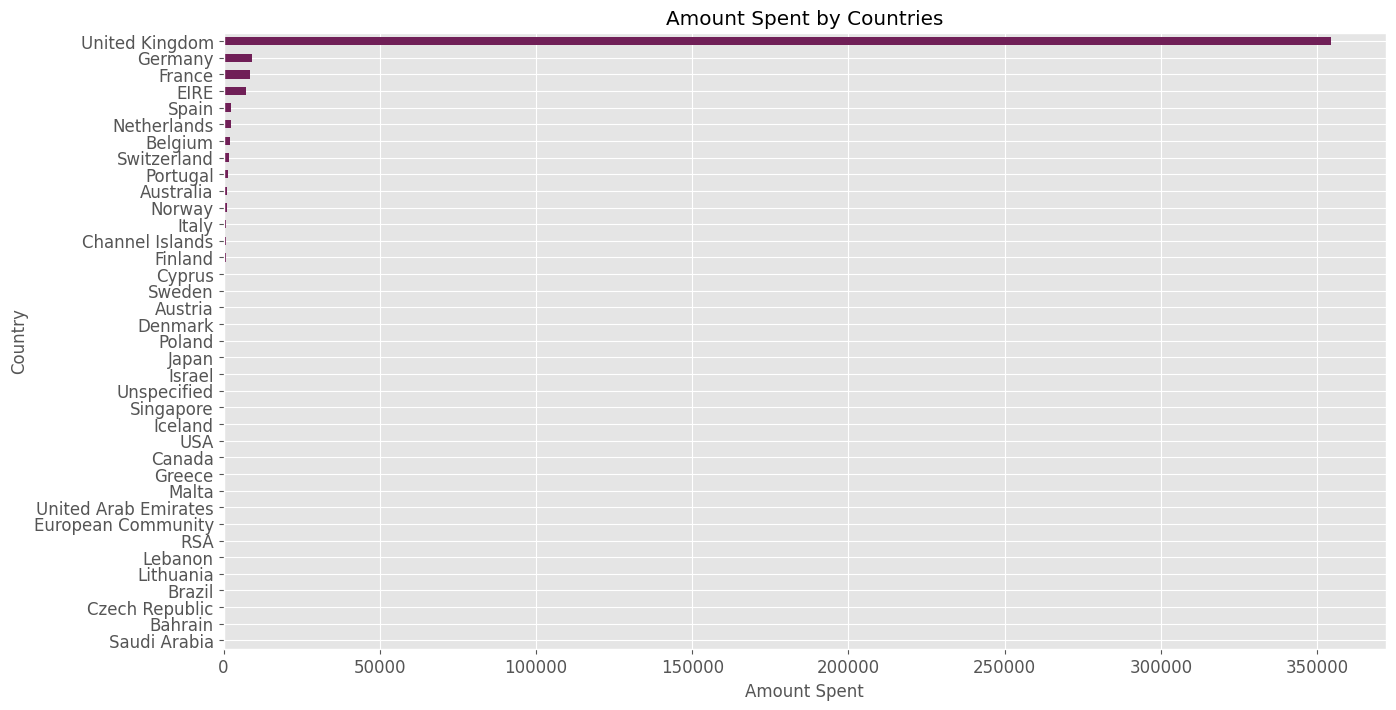

In [ ]:
country_amount = ecom.groupby('Country')['AmountSpent'].count().sort_values()

plt.subplots(figsize=(15,8))
country_amount.plot.barh(fontsize=12,color=color[1])
plt.xlabel('Amount Spent', fontsize=12)
plt.ylabel('Country',fontsize=12)
plt.title('Amount Spent by Countries')
plt.show()

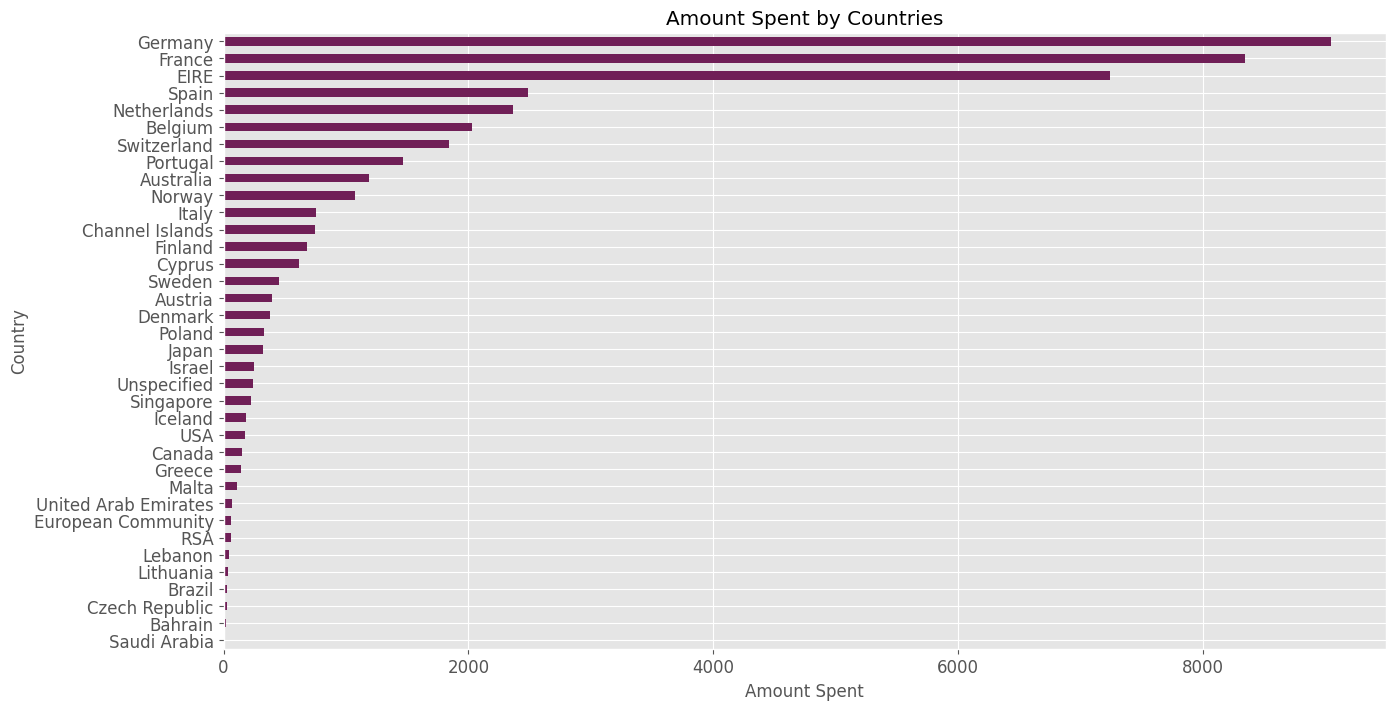

In [ ]:
# Excluding UK for more clarity on the rest of the countries
country_amount_without_uk = country_amount.copy()
del country_amount_without_uk['United Kingdom']

plt.subplots(figsize=(15,8))
country_amount_without_uk.plot.barh(fontsize=12,color=color[1])
plt.xlabel('Amount Spent', fontsize=12)
plt.ylabel('Country',fontsize=12)
plt.title('Amount Spent by Countries')
plt.show()

### No of Orders Per Customer

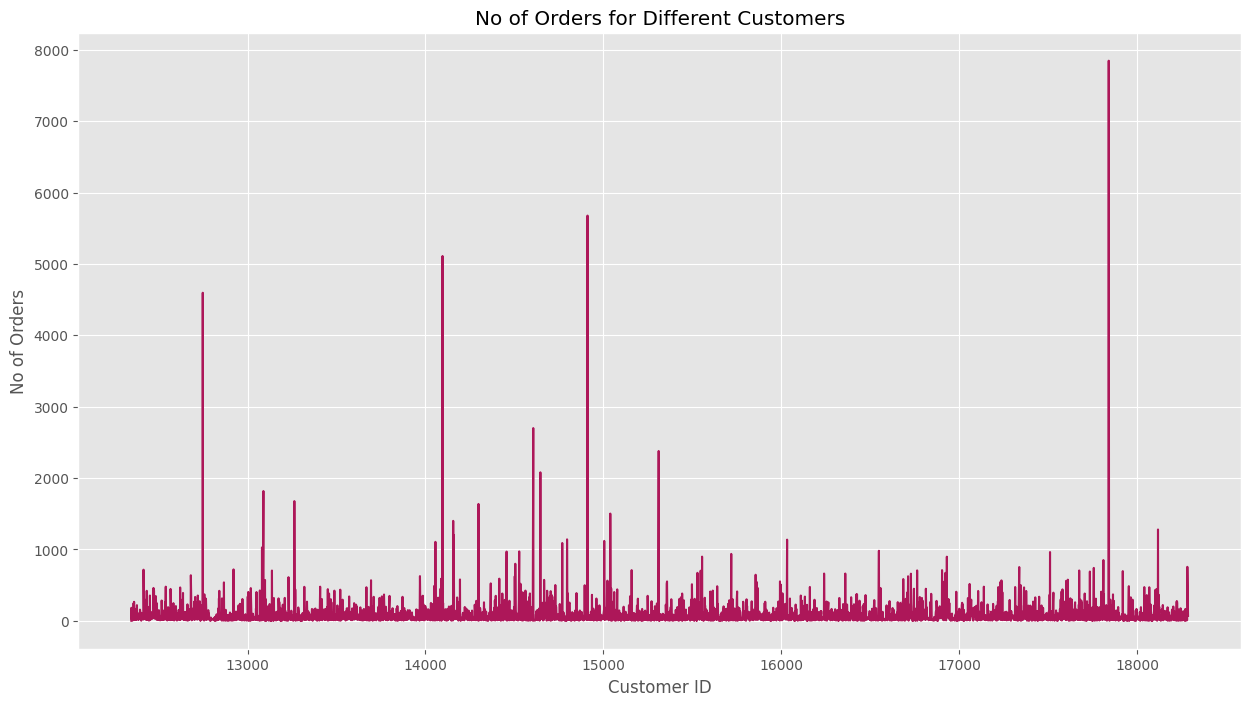

In [ ]:
cust_orders = ecom.groupby('CustomerID',as_index=False)['InvoiceNo'].count()

plt.subplots(figsize=(15,8))
plt.plot(cust_orders.CustomerID,cust_orders.InvoiceNo,color=color[2])
plt.xlabel('Customer ID', fontsize=12)
plt.ylabel('No of Orders',fontsize=12)
plt.title('No of Orders for Different Customers')
plt.show()

#### Top 10 customers by No of Orders

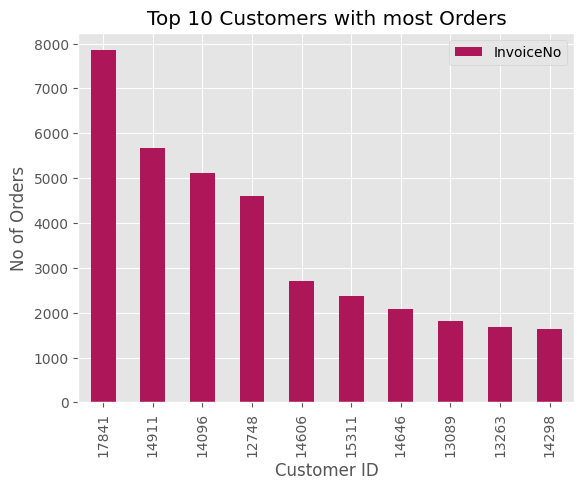

In [ ]:
top_10_cust_orders = cust_orders.sort_values(by='InvoiceNo',ascending=False).head(10)

top_10_cust_orders.plot(x='CustomerID',y='InvoiceNo',kind='bar',color=color[2])
plt.xlabel('Customer ID', fontsize=12)
plt.ylabel('No of Orders',fontsize=12)
plt.title('Top 10 Customers with most Orders')
plt.show()

### Money Spent by Different Customers

In [ ]:
ecom.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,AmountSpent,MonthYear,Year,Month,Day,Weekday,Hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010-12,2010,12,1,3,8
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,2010,12,1,3,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010-12,2010,12,1,3,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,2010,12,1,3,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,2010,12,1,3,8


In [ ]:
cust_amt = ecom.groupby('CustomerID',as_index=False)['AmountSpent'].sum()
cust_amt.head()

,CustomerID,AmountSpent
0,12346,77183.60
1,12347,4310.00
2,12348,1797.24
3,12349,1757.55
4,12350,334.40


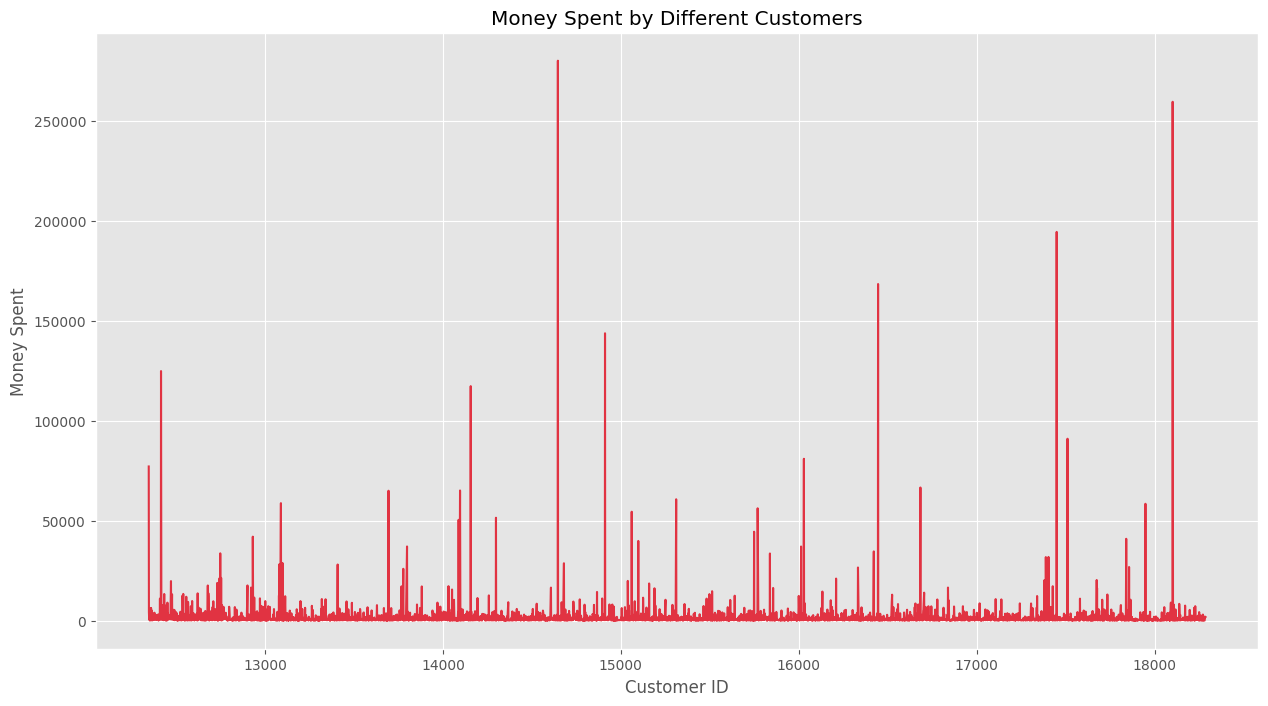

In [ ]:
plt.subplots(figsize=(15,8))
plt.plot(cust_amt.CustomerID,cust_amt.AmountSpent,color=color[3])
plt.xlabel('Customer ID', fontsize=12)
plt.ylabel('Money Spent',fontsize=12)
plt.title('Money Spent by Different Customers')
plt.show()

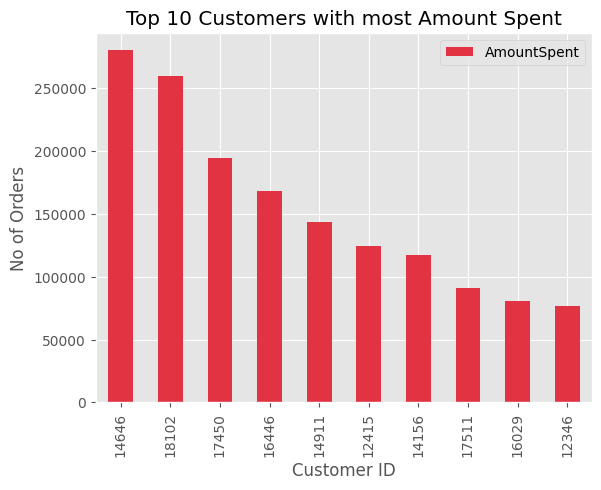

In [ ]:
top_10_cust_amt = cust_amt.sort_values(by='AmountSpent',ascending=False).head(10)

top_10_cust_amt.plot(x='CustomerID',y='AmountSpent',kind='bar',color=color[3])
plt.xlabel('Customer ID', fontsize=12)
plt.ylabel('No of Orders',fontsize=12)
plt.title('Top 10 Customers with most Amount Spent')
plt.show()

### No of Orders Per Month

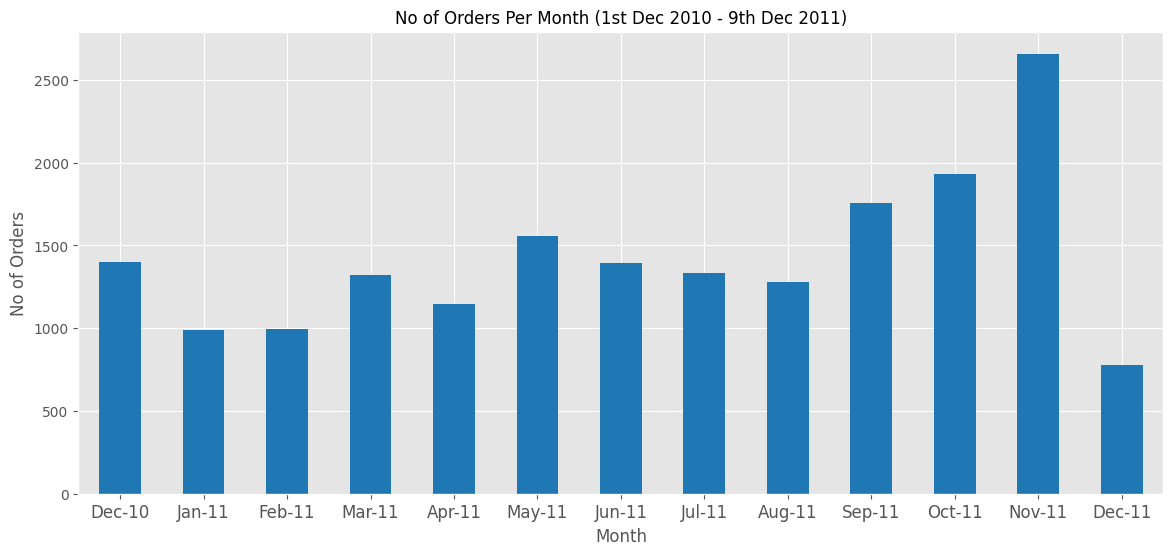

In [ ]:
ax = ecom.groupby('InvoiceNo')['MonthYear'].unique().value_counts().sort_index().plot(kind='bar',color=color1[0],figsize=(14,6))
ax.set_xlabel('Month',fontsize=12)
ax.set_ylabel('No of Orders',fontsize=12)
ax.set_title('No of Orders Per Month (1st Dec 2010 - 9th Dec 2011)',fontsize=12)
ax.set_xticklabels(('Dec-10','Jan-11','Feb-11','Mar-11','Apr-11','May-11','Jun-11','Jul-11','Aug-11','Sep-11','Oct-11','Nov-11','Dec-11'),rotation='horizontal',fontsize=12)
plt.show()

### No of Orders Per Day of Week

In [ ]:
ecom['Weekday'].unique()

array([3, 4, 5, 7, 1, 2])

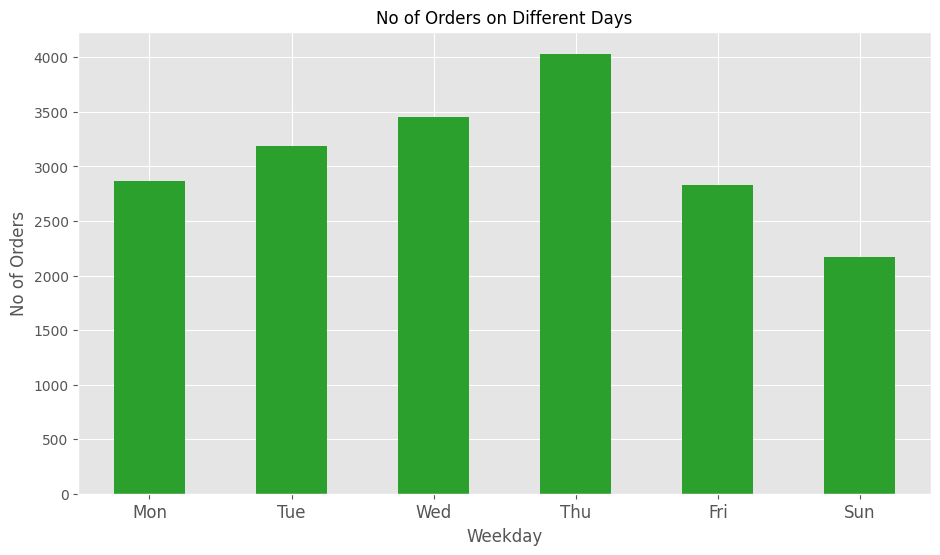

In [ ]:
# No orders are placed on Sat
ax = ecom.groupby('InvoiceNo')['Weekday'].unique().value_counts().sort_index().plot(kind='bar',color=color1[2],figsize=(11,6))
ax.set_xlabel('Weekday',fontsize=12)
ax.set_ylabel('No of Orders',fontsize=12)
ax.set_title('No of Orders on Different Days',fontsize=12)
ax.set_xticklabels(('Mon','Tue','Wed','Thu','Fri','Sun'),rotation='horizontal',fontsize=12)
plt.show()

### No of Orders on Different Hours

In [ ]:
ecom['Hour'].unique()

array([ 8,  9, 10, 11, 12, 13, 14, 15, 16, 17,  7, 18, 19, 20,  6])

In [ ]:
ax = ecom.groupby('InvoiceNo')['Hour'].unique().value_counts().iloc[:14].sort_index()
ax.head(30)

[7]       29
[8]      555
[9]     1394
[10]    2226
[11]    2276
[12]    3129
[13]    2637
[14]    2275
[15]    2038
[16]    1100
[17]     544
[18]     169
[19]     144
[20]      18
Name: Hour, dtype: int64

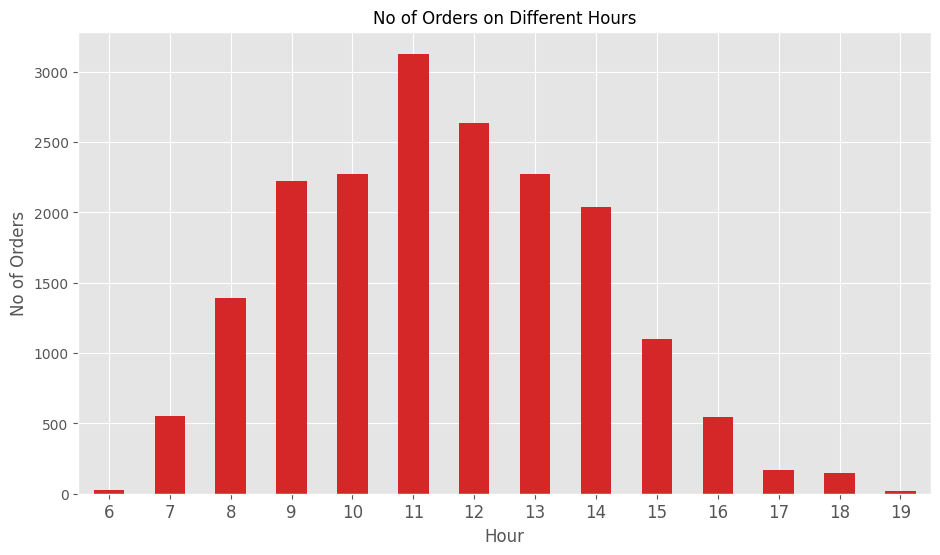

In [ ]:
ax = ecom.groupby('InvoiceNo')['Hour'].unique().value_counts().iloc[:14].sort_index().plot(kind='bar',color=color1[3],figsize=(11,6))
ax.set_xlabel('Hour',fontsize=12)
ax.set_ylabel('No of Orders',fontsize=12)
ax.set_title('No of Orders on Different Hours',fontsize=12)
ax.set_xticklabels(range(6,20),rotation='horizontal',fontsize=12)
plt.show()

### Analyse Unit Price of Items

In [ ]:
ecom.UnitPrice.describe()

count    397924.000000
mean          3.116174
std          22.096788
min           0.000000
25%           1.250000
50%           1.950000
75%           3.750000
max        8142.750000
Name: UnitPrice, dtype: float64

It can be seen that there are free items in the data

In [ ]:
# Printing free items
free_items = ecom[ecom['UnitPrice']==0]
free_items

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,AmountSpent,MonthYear,Year,Month,Day,Weekday,Hour
9302,537197,22841,ROUND CAKE TIN VINTAGE GREEN,1,2010-12-05 14:02:00,0.0,12647,Germany,0.0,2010-12,2010,12,5,7,14
33576,539263,22580,ADVENT CALENDAR GINGHAM SACK,4,2010-12-16 14:36:00,0.0,16560,United Kingdom,0.0,2010-12,2010,12,16,4,14
40089,539722,22423,REGENCY CAKESTAND 3 TIER,10,2010-12-21 13:45:00,0.0,14911,EIRE,0.0,2010-12,2010,12,21,2,13
47068,540372,22090,PAPER BUNTING RETROSPOT,24,2011-01-06 16:41:00,0.0,13081,United Kingdom,0.0,2011-01,2011,1,6,4,16
47070,540372,22553,PLASTERS IN TIN SKULLS,24,2011-01-06 16:41:00,0.0,13081,United Kingdom,0.0,2011-01,2011,1,6,4,16
56674,541109,22168,ORGANISER WOOD ANTIQUE WHITE,1,2011-01-13 15:10:00,0.0,15107,United Kingdom,0.0,2011-01,2011,1,13,4,15
86789,543599,84535B,FAIRY CAKES NOTEBOOK A6 SIZE,16,2011-02-10 13:08:00,0.0,17560,United Kingdom,0.0,2011-02,2011,2,10,4,13
130188,547417,22062,CERAMIC BOWL WITH LOVE HEART DESIGN,36,2011-03-23 10:25:00,0.0,13239,United Kingdom,0.0,2011-03,2011,3,23,3,10
139453,548318,22055,MINI CAKE STAND HANGING STRAWBERY,5,2011-03-30 12:45:00,0.0,13113,United Kingdom,0.0,2011-03,2011,3,30,3,12
145208,548871,22162,HEART GARLAND RUSTIC PADDED,2,2011-04-04 14:42:00,0.0,14410,United Kingdom,0.0,2011-04,2011,4,4,1,14


In [ ]:
len(free_items)

40

In [ ]:
free_items['MonthYear'].value_counts().sort_index()

2010-12     3
2011-01     3
2011-02     1
2011-03     2
2011-04     2
2011-05     2
2011-07     2
2011-08     6
2011-09     2
2011-10     3
2011-11    14
Freq: M, Name: MonthYear, dtype: int64

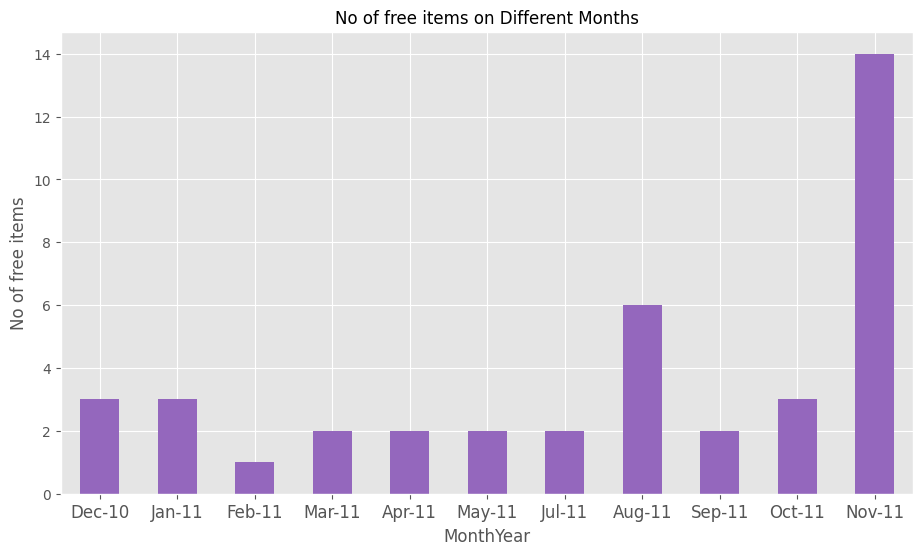

In [ ]:
ax = free_items['MonthYear'].value_counts().sort_index().plot(kind='bar',color=color1[4],figsize=(11,6))
ax.set_xlabel('MonthYear',fontsize=12)
ax.set_ylabel('No of free items',fontsize=12)
ax.set_title('No of free items on Different Months',fontsize=12)
ax.set_xticklabels(('Dec-10','Jan-11','Feb-11','Mar-11','Apr-11','May-11','Jul-11','Aug-11','Sep-11','Oct-11','Nov-11'),rotation='horizontal',fontsize=12)
plt.show()

On Average, the company gives 2-3 free items every month except for June. Also, the no of free items see a hike in the months August and November

###  Repeat Customers

In [ ]:
ecom.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,AmountSpent,MonthYear,Year,Month,Day,Weekday,Hour
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,10.20,2011-12,2011,12,9,5,12
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,12.60,2011-12,2011,12,9,5,12
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,16.60,2011-12,2011,12,9,5,12
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,16.60,2011-12,2011,12,9,5,12
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680,France,14.85,2011-12,2011,12,9,5,12


In [ ]:
print('Date Range : %s to %s'%(ecom['InvoiceDate'].min(),ecom['InvoiceDate'].max()))

Date Range : 2010-12-01 08:26:00 to 2011-12-09 12:50:00


In [ ]:
# Since the date range starts at 1-Dec-2010, the end date can be taken as 30-Nov-2011
ecom_final = ecom[ecom['InvoiceDate'] < '2011-12-01']
ecom_final.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,AmountSpent,MonthYear,Year,Month,Day,Weekday,Hour
516364,579885,85034C,3 ROSE MORRIS BOXED CANDLES,4,2011-11-30 17:37:00,1.25,15444,United Kingdom,5.00,2011-11,2011,11,30,3,17
516365,579885,21742,LARGE ROUND WICKER PLATTER,2,2011-11-30 17:37:00,5.95,15444,United Kingdom,11.90,2011-11,2011,11,30,3,17
516366,579885,23084,RABBIT NIGHT LIGHT,6,2011-11-30 17:37:00,2.08,15444,United Kingdom,12.48,2011-11,2011,11,30,3,17
516367,579885,21257,VICTORIAN SEWING BOX MEDIUM,1,2011-11-30 17:37:00,7.95,15444,United Kingdom,7.95,2011-11,2011,11,30,3,17
516368,579885,21259,VICTORIAN SEWING BOX SMALL,1,2011-11-30 17:37:00,5.95,15444,United Kingdom,5.95,2011-11,2011,11,30,3,17


In [ ]:
# Total amount spent per invoice by customers of different countries
invoice_cust = ecom_final.groupby(by=['InvoiceNo','InvoiceDate']).agg({'AmountSpent':sum,'CustomerID':max,'Country':max}).reset_index()
invoice_cust.tail()

,InvoiceNo,InvoiceDate,AmountSpent,CustomerID,Country
17783,579868,2011-11-30 16:43:00,328.32,15544,United Kingdom
17784,579870,2011-11-30 16:47:00,292.41,12437,France
17785,579872,2011-11-30 16:54:00,278.82,14085,United Kingdom
17786,579881,2011-11-30 17:22:00,905.52,12429,Denmark
17787,579885,2011-11-30 17:37:00,1075.36,15444,United Kingdom


In [ ]:
invoice_cust.sort_values(by='AmountSpent',ascending=False).head(10)

,InvoiceNo,InvoiceDate,AmountSpent,CustomerID,Country
1911,541431,2011-01-18 10:01:00,77183.60,12346,United Kingdom
7949,556444,2011-06-10 15:28:00,38970.00,15098,United Kingdom
12446,567423,2011-09-20 11:05:00,31698.16,17450,United Kingdom
8135,556917,2011-06-15 13:37:00,22775.93,12415,Australia
14487,572209,2011-10-21 12:08:00,22206.00,18102,United Kingdom
12438,567381,2011-09-20 10:12:00,22104.80,17450,United Kingdom
10869,563614,2011-08-18 08:51:00,21880.44,12415,Australia
5481,550461,2011-04-18 13:20:00,21535.90,15749,United Kingdom
14399,572035,2011-10-20 12:03:00,20277.92,14646,Netherlands
10637,563076,2011-08-11 16:12:00,19150.66,14646,Netherlands


Inorder to find the number of repeat customers in each month, 'InvoiceDate' is set as the index, with Grouper(freq='M') to group the data by month. Then the data is grouped by CustomerID and the number of unique repeat customers is calculated using filter function wherein lambda function is used to subselect the data ie., those greater than 1.

In [ ]:
monthly_repeat_cust = invoice_cust.set_index('InvoiceDate').groupby([pd.Grouper(freq='M'),'CustomerID']).filter(lambda x: len(x)>1).resample('M').nunique()['CustomerID']

monthly_repeat_cust

InvoiceDate
2010-12-31    263
2011-01-31    153
2011-02-28    153
2011-03-31    203
2011-04-30    170
2011-05-31    281
2011-06-30    220
2011-07-31    227
2011-08-31    198
2011-09-30    272
2011-10-31    324
2011-11-30    541
Freq: M, Name: CustomerID, dtype: int64

In [ ]:
# Monthly Unique Customers
monthly_unique_cust = ecom_final.set_index('InvoiceDate')['CustomerID'].resample('M').nunique()
monthly_unique_cust

InvoiceDate
2010-12-31     885
2011-01-31     741
2011-02-28     758
2011-03-31     974
2011-04-30     856
2011-05-31    1056
2011-06-30     991
2011-07-31     949
2011-08-31     935
2011-09-30    1266
2011-10-31    1364
2011-11-30    1665
Freq: M, Name: CustomerID, dtype: int64

In [ ]:
# Monthly Repeat Percentage
monthly_repeat_perc = monthly_repeat_cust/monthly_unique_cust*100
monthly_repeat_perc

InvoiceDate
2010-12-31    29.717514
2011-01-31    20.647773
2011-02-28    20.184697
2011-03-31    20.841889
2011-04-30    19.859813
2011-05-31    26.609848
2011-06-30    22.199798
2011-07-31    23.919916
2011-08-31    21.176471
2011-09-30    21.484992
2011-10-31    23.753666
2011-11-30    32.492492
Freq: M, Name: CustomerID, dtype: float64

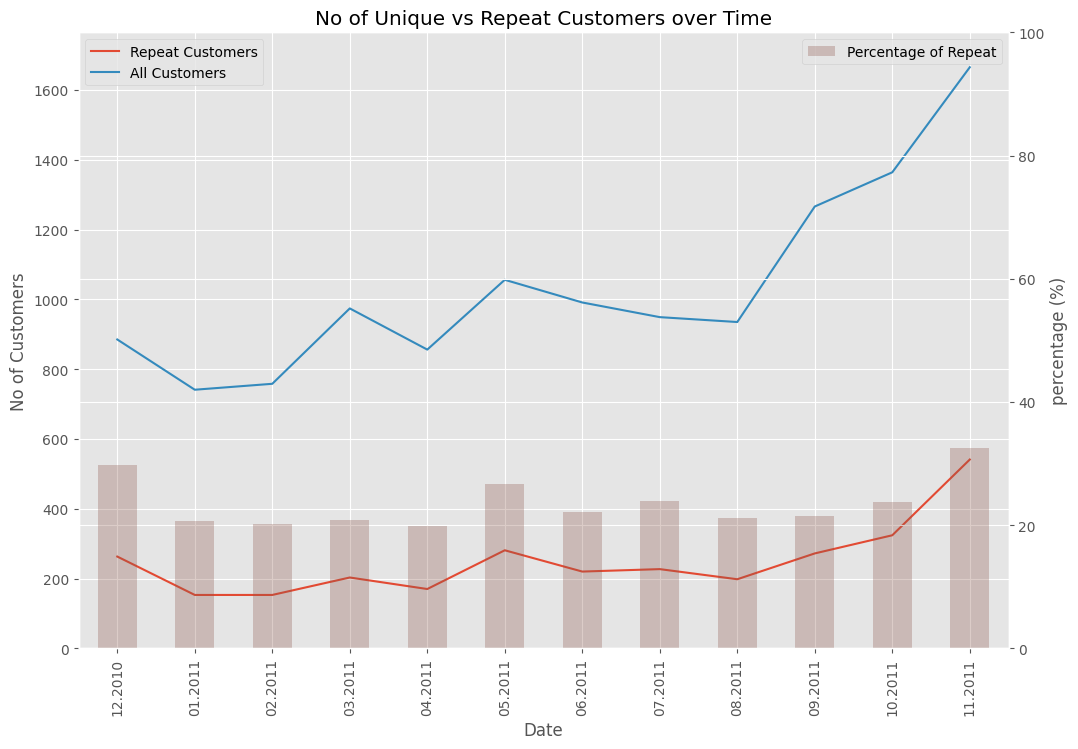

In [ ]:
# Plotting monthly unique and repeat customers
ax = pd.DataFrame(monthly_repeat_cust.values).plot(figsize=(12,8))
pd.DataFrame(monthly_unique_cust.values).plot(ax=ax,grid=True)

ax2 = pd.DataFrame(monthly_repeat_perc.values).plot.bar(ax=ax,grid=True,secondary_y=True,color=color1[5],alpha=0.3)

ax.set_xlabel('Date')
ax.set_ylabel('No of Customers')
ax.set_title('No of Unique vs Repeat Customers over Time')

ax2.set_ylabel('percentage (%)')

ax.legend(['Repeat Customers','All Customers'])
ax2.legend(['Percentage of Repeat'],loc='upper right')

ax.set_ylim([0,monthly_unique_cust.values.max()+100])
ax2.set_ylim([0,100])

plt.xticks(range(len(monthly_repeat_cust.index)),[x.strftime('%m.%Y') for x in monthly_repeat_cust.index],rotation=45)

plt.show()

### Relationship between Revenue and Repeat Customers

In [ ]:
monthly_revenue = ecom_final.set_index('InvoiceDate')['AmountSpent'].resample('M').sum()

# Monthly revenue from repeat customers
monthly_rev_repeat_cust = invoice_cust.set_index('InvoiceDate').groupby([pd.Grouper(freq='M'),'CustomerID']).filter(lambda x: len(x)>1).resample('M').sum()['AmountSpent']

# Percentage of revenue from repeat customers
monthly_rev_repeat_perc = monthly_rev_repeat_cust/monthly_revenue*100
monthly_rev_repeat_perc


<ipython-input-54-3a83f1803fce>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  monthly_rev_repeat_cust = invoice_cust.set_index('InvoiceDate').groupby([pd.Grouper(freq='M'),'CustomerID']).filter(lambda x: len(x)>1).resample('M').sum()['AmountSpent']


InvoiceDate
2010-12-31    62.713792
2011-01-31    39.007101
2011-02-28    42.767478
2011-03-31    44.901787
2011-04-30    41.661132
2011-05-31    55.732401
2011-06-30    56.911595
2011-07-31    52.904475
2011-08-31    49.141899
2011-09-30    52.544416
2011-10-31    55.229144
2011-11-30    61.436148
Freq: M, Name: AmountSpent, dtype: float64

In [ ]:
monthly_rev_repeat_cust

InvoiceDate
2010-12-31    359170.60
2011-01-31    222124.00
2011-02-28    191229.37
2011-03-31    267390.48
2011-04-30    195474.18
2011-05-31    378197.04
2011-06-30    376307.26
2011-07-31    317475.00
2011-08-31    317134.25
2011-09-30    500663.36
2011-10-31    574006.87
2011-11-30    713775.85
Freq: M, Name: AmountSpent, dtype: float64

In [ ]:
monthly_revenue

InvoiceDate
2010-12-31     572713.890
2011-01-31     569445.040
2011-02-28     447137.350
2011-03-31     595500.760
2011-04-30     469200.361
2011-05-31     678594.560
2011-06-30     661213.690
2011-07-31     600091.011
2011-08-31     645343.900
2011-09-30     952838.382
2011-10-31    1039318.790
2011-11-30    1161817.380
Freq: M, Name: AmountSpent, dtype: float64

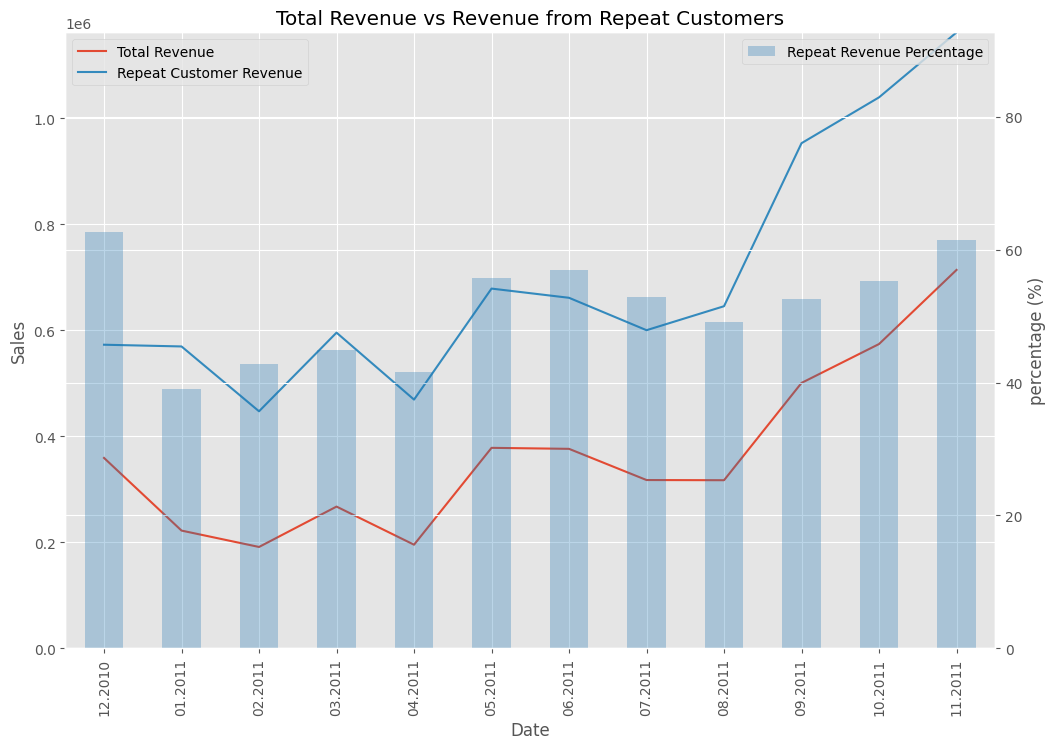

In [ ]:
ax = pd.DataFrame(monthly_rev_repeat_cust.values).plot(figsize=(12,8))
pd.DataFrame(monthly_revenue.values).plot(ax=ax,grid=True)

ax2 = pd.DataFrame(monthly_rev_repeat_perc.values).plot.bar(ax=ax,grid=True,secondary_y=True,color=color1[0],alpha=0.3)

ax.set_xlabel('Date')
ax.set_ylabel('Sales')
ax.set_title('Total Revenue vs Revenue from Repeat Customers')

ax2.set_ylabel('percentage (%)')

ax.legend(['Total Revenue','Repeat Customer Revenue'])
ax2.legend(['Repeat Revenue Percentage'],loc='upper right')

ax.set_ylim([0, max(monthly_revenue.values)])
ax.set_ylim([0,monthly_revenue.values.max()+100])
ax2.set_ylim([0, max(monthly_rev_repeat_perc.values)+30])

plt.xticks(range(len(monthly_rev_repeat_cust.index)),[x.strftime('%m.%Y') for x in monthly_rev_repeat_cust.index],rotation=45)

#ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x)//10**6, ',')))

plt.show()

### Item Trends

#### Quantity of Each Items Sold Per Month

In [ ]:
monthly_items = ecom_final.set_index('InvoiceDate').groupby([pd.Grouper(freq='M'),'StockCode'])['Quantity'].sum()

monthly_items

InvoiceDate  StockCode   
2010-12-31   10002            224
             10120             16
             10125            143
             10133            123
             10135            366
                             ... 
2011-11-30   BANK CHARGES       2
             C2                22
             DOT                4
             M               3893
             POST             460
Name: Quantity, Length: 28234, dtype: int64

In [ ]:
# Top 5 items sold per month
items = ecom_final.groupby(by=['StockCode','InvoiceDate'],as_index=False)['Quantity'].sum()
top_5_items = items.sort_values(by='Quantity',ascending=False).head(5)
top_5_items.head()

,StockCode,InvoiceDate,Quantity
253202,23166,2011-01-18 10:01:00,74215
327080,84826,2011-11-25 15:57:00,12540
322817,84077,2011-10-27 12:26:00,4800
115045,22197,2011-05-27 10:52:00,4300
92475,22053,2011-02-22 10:43:00,3906


In [ ]:
items_date = ecom.loc[ecom['StockCode'].isin(top_5_items.StockCode)].set_index('InvoiceDate').groupby([pd.Grouper(freq='M'),'StockCode'])['Quantity'].sum()
items_date

InvoiceDate  StockCode
2010-12-31   22053           10
             22197         2110
             84077         5139
             84826          366
2011-01-31   22053            5
             22197         1697
             23166        74215
             84077         1488
             84826          480
2011-02-28   22053         3986
             22197         2505
             84077         3457
             84826           66
2011-03-31   22053          166
             22197         2034
             84077         3888
             84826           60
2011-04-30   22053           24
             22197         1801
             84077        10224
             84826            1
2011-05-31   22053            2
             22197         6738
             23166          792
             84077         4944
2011-06-30   22053           10
             22197         1989
             23166          391
             84077         1920
             84826            1
2011-07-31   2219

In [ ]:
trending_items = items_date.reset_index().pivot('InvoiceDate','StockCode').fillna(0)

trending_items = trending_items.reset_index()
trending_items = trending_items.set_index('InvoiceDate')
trending_items.columns = trending_items.columns.droplevel(0)
trending_items

<ipython-input-91-04b2746d48ad>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  trending_items = items_date.reset_index().pivot('InvoiceDate','StockCode').fillna(0)


StockCode,22053,22197,23166,84077,84826
InvoiceDate,,,,,
2010-12-31,10.0,2110.0,0.0,5139.0,366.0
2011-01-31,5.0,1697.0,74215.0,1488.0,480.0
2011-02-28,3986.0,2505.0,0.0,3457.0,66.0
2011-03-31,166.0,2034.0,0.0,3888.0,60.0
2011-04-30,24.0,1801.0,0.0,10224.0,1.0
2011-05-31,2.0,6738.0,792.0,4944.0,0.0
2011-06-30,10.0,1989.0,391.0,1920.0,1.0
2011-07-31,0.0,1787.0,718.0,3600.0,2.0
2011-08-31,2.0,5286.0,405.0,2256.0,72.0


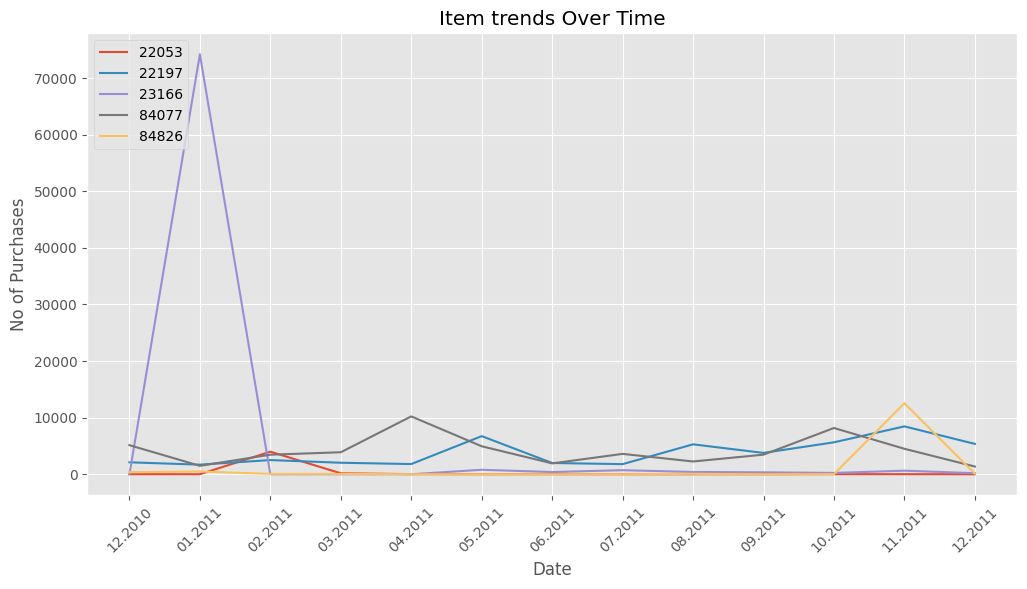

In [ ]:
# Plotting the trending items
ax = pd.DataFrame(trending_items.values).plot(figsize=(12,6),grid=True)

ax.set_ylabel('No of Purchases')
ax.set_xlabel('Date')
ax.set_title('Item trends Over Time')

ax.legend(trending_items.columns,loc='upper left')

plt.xticks(range(len(trending_items.index)),[x.strftime('%m.%Y') for x in trending_items.index],rotation=45)

plt.show()